In [160]:
import numpy as np
import matplotlib.pyplot as plt

In [161]:
#a)
roots, weights = np.polynomial.legendre.leggauss(50)


In [162]:
k=1.942930396
#b)
def g(x,y,z,r,phi):
    return -k*z*r/(x**2 + y**2 + z**2 - 2*r*x*np.cos(phi) - 2*r*y*np.sin(phi) + r**2)**(3/2)


In [163]:
#c)
def DobleCuadratura(x,y,z,a=0.,b=1.,c=0.,d=2*np.pi):
    r_raices = 0.5*((b-a)*roots + b + a)
    phi_raices = 0.5*((d-c)*roots + c + d)
    integral = 0.
    for i in range(len(roots)):
        for j in range(len(roots)):
            integral += weights[i]*weights[j]*g(x,y,z, r_raices[i], phi_raices[j]) 
    integral *= 0.25*(b - a)*(d - c)
    return integral
#d)
DobleCuadratura(0.,0.,0.2) #Si da g=-9.813646m/s^2

np.float64(-9.813646786905919)

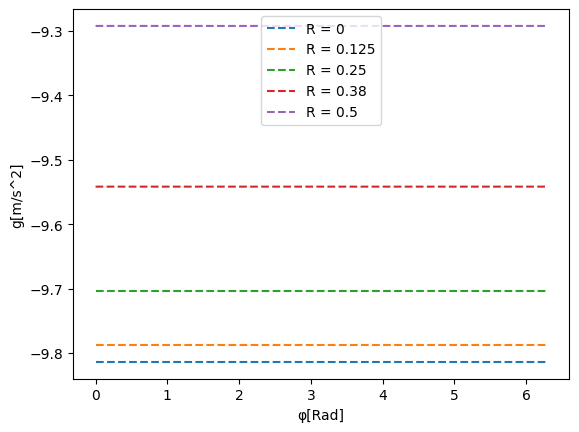

In [164]:
#e)
R= [0,0.125,0.25,0.38,0.5]
phi = np.linspace(0,2*np.pi,10)
for r in R:
    a = []
    for p in phi:
        a.append(DobleCuadratura(r*np.cos(p),r*np.sin(p), 0.2))
    plt.plot(phi,a,linestyle='--', label=f'R = {r}')
plt.xlabel('φ[Rad]')
plt.ylabel('g[m/s^2]')
plt.legend()
plt.show()
        

In [165]:
#f) En el modelo de disco de densidad superficial de masa uniforme esto quiere decir que la gravedad solo depende
# del radio medido desde el centro. En otras palabras, el valor del campo solo depende en realidad de la distancia al 
# centro de masa del disco, sin importar en que dirección, ya sea mirando hacia el polo sur o mirando a Asia/Europa.

In [166]:
#g)
print(f"En el ecuador la gravedad es de {DobleCuadratura(0.5*np.cos(p),0.5*np.sin(p), 0.2)} para z=0.2")
print(f"En el borde la gravedad es de {DobleCuadratura(np.cos(p),np.sin(p), 0.2)} para z=0.2")

En el ecuador la gravedad es de -9.292620391665523 para z=0.2
En el borde la gravedad es de -4.6730471174430175 para z=0.2


In [167]:
#h) A mi amigo le diría que esto es la prueba clara de que la tierra NO es plana ni un disco: en su modelo,
# la gravedad es más intensa en el centro del disco y disminuye a medida que nos acercamos a los bordes. Esto contrasta
# con nuestra experiencia cotidiana, en la que todos experimentamos la misma intensidad de gravedad en diferentes puntos
# de la superficie de la tierra. Es indiscutible que la gravedad depende de la distancia al centro de masa de la tierra (f),
# pero para que esta sea la misma en cualquier punto de la superficie, la tierra debe ser una esfera. Le diría a mi amigo, entonces
# que mis resultados teóricos son una pruebaa IRREFUTABLE que la tierra NO es plana, sino un esferoide.